In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import skfuzzy as fuzz

In [19]:
def csv2dictionary(file_path, key_col, value_col):
    """
    Reads a CSV file and converts it into a dictionary.

    Parameters:
        file_path (str): Path to the CSV file.
        key_col (str): Name of the column to use as dictionary keys.
        value_col (str): Name of the column to use as dictionary values.

    Returns:
        dict: A dictionary created from the CSV file.
    """
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, sep=",")
    
    # Convert the DataFrame to a dictionary
    result_dict = dict(zip(df[key_col], df[value_col]))

    return result_dict


In [20]:
# Step 1: Read the CSV file
file_path = "data/ESG_0706_3.csv"  # Replace with the correct path to your file
data = pd.read_csv(file_path, sep=" ")
data

,Country,Raised,num,ESG,EPI,CO2_E,CO2_pc,E_RNEW,Env_Taxes_gdp,WUI,...,EODoing_business,GDPUSD,GDPpc,Consumerprice,Reservas,Exchande_rate,Gini_index,Bank_capital,non_performing_loans,Paying_tax
0,Afghanistan,0.0,1,0.02,37.50,10022.78,0.28,19.21,0.00,0.14,...,38.9,0.00,530.15,4.98,0.00,68.03,0.0,0.00,0.00,47.9
1,Afghanistan,5112201.0,1,0.00,37.74,10972.38,0.30,17.96,0.00,0.06,...,37.1,0.00,502.06,0.62,0.00,72.08,0.0,0.00,0.00,71.4
2,Albania,450000.0,3,0.00,74.38,5403.70,1.88,36.94,3.07,0.08,...,64.2,13058.56,4531.03,1.97,3601.62,119.07,33.1,10.17,13.23,36.9
3,Argentina,29036200.0,1,0.00,79.84,179267.30,4.07,10.37,1.32,0.06,...,57.2,642992.08,14613.04,0.00,0.00,16.54,41.1,11.57,1.83,106.0
4,Argentina,23138212.0,16,0.00,59.30,176894.60,3.98,10.52,1.09,0.20,...,57.3,543831.80,11795.16,0.00,0.00,28.14,41.3,11.04,3.11,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,Vietnam,5650000.0,1,0.00,46.96,341716.80,3.57,20.65,0.82,0.00,...,68.6,258577.35,3491.09,2.79,0.00,23226.26,0.0,7.83,1.50,37.8
335,Vietnam,0.0,1,0.00,20.10,355323.10,3.68,19.11,0.75,0.07,...,69.8,269556.18,3586.35,3.21,0.00,23235.70,36.8,7.83,1.50,37.6
336,Zimbabwe,8142181.0,1,0.01,43.41,11069.90,0.74,80.43,0.00,0.04,...,48.6,0.00,2269.18,0.00,0.00,72.51,0.0,0.00,0.00,31.6
337,Zimbabwe,16400000.0,3,0.00,43.41,10185.30,0.66,81.52,0.00,0.03,...,50.5,0.00,1421.87,0.00,0.00,11.02,50.3,0.00,0.00,31.6


In [23]:
code_path = "data/country_codes.csv"  # Replace with the correct path to your file
code_df = pd.read_csv(code_path, sep=",")

country_codes = csv2dictionary(code_path, 'Country', 'Code')
#country_codes

In [24]:
# Extract the country names (first column)
country_names = data.iloc[:, 0]

In [25]:
# Extract the data for clustering (all columns except the first)
X = data.iloc[:, 1:].values

In [26]:
# Step 2: Perform Fuzzy C-Means clustering
n_clusters = 2  # You can adjust this based on your data
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
)
cluster_membership = np.argmax(u, axis=0)
#cluster_membership

In [27]:
# Step 3: Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

In [28]:
# Create a DataFrame for the t-SNE results and cluster assignments
results_df = pd.DataFrame({
    "Country": country_names,
    "TSNE-1": X_tsne[:, 0],
    "TSNE-2": X_tsne[:, 1],
    "Cluster": cluster_membership
})

Macedonia  
Macedonia  
Macedonia  


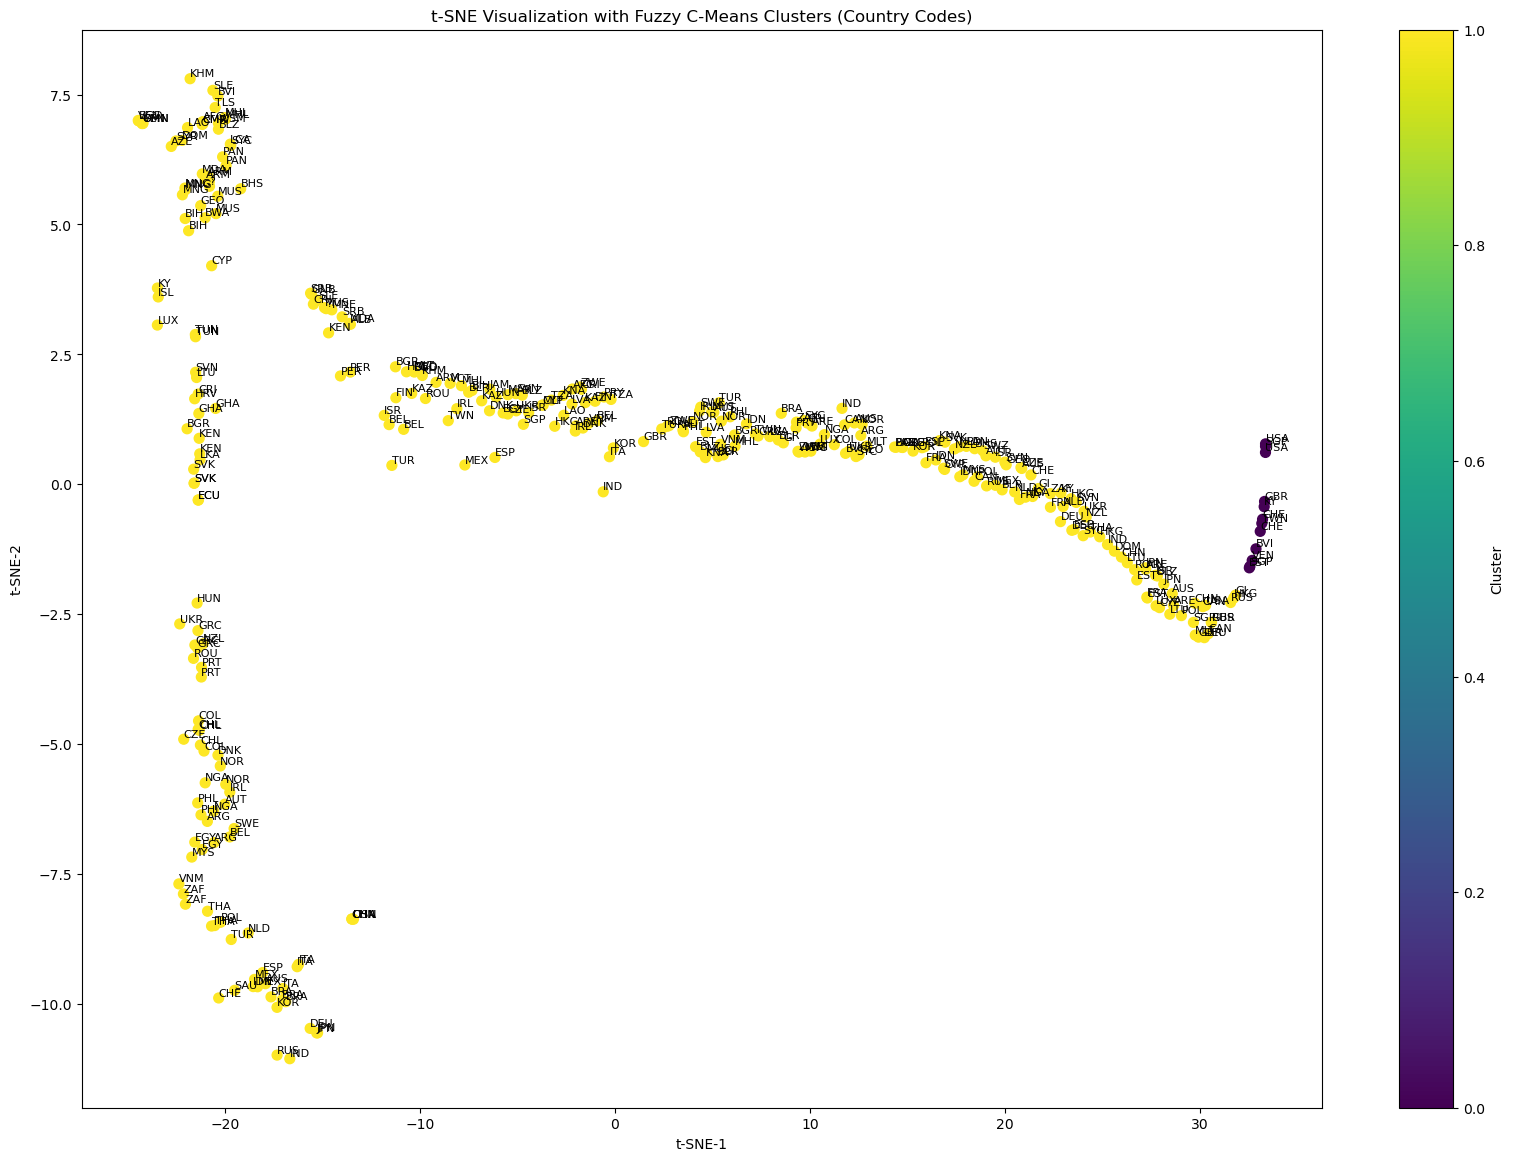

In [29]:
# Step 4: Visualize the clusters with country names
plt.figure(figsize=(20, 14))
scatter = plt.scatter(results_df["TSNE-1"], results_df["TSNE-2"], c=results_df["Cluster"], cmap='viridis', s=50)

# Annotate each point with its country code
for i, country in enumerate(country_names):
    code = country_codes.get(country, "?")  # Use "?" if the country code is not found
    if code =="?":
        print(country, " ")
    plt.text(X_tsne[i, 0], X_tsne[i, 1], code, fontsize=8, ha='left', va='bottom')

plt.title("t-SNE Visualization with Fuzzy C-Means Clusters (Country Codes)")
plt.colorbar(scatter, label="Cluster")
plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")
plt.show()

In [190]:
# Step 6: Retrieve elements of each cluster
clusters = {i: [] for i in range(n_clusters)}  # Dictionary to store elements of each cluster

for idx, cluster_id in enumerate(cluster_membership):
    country = country_names[idx]
    code = country_codes.get(country, "?")
    clusters[cluster_id].append((country, code, X_tsne[idx]))  # Store country name, code, and t-SNE coordinates

# Print elements of each cluster
for cluster_id, elements in clusters.items():
    print(f"Cluster {cluster_id + 1}:")
    for country, code, coords in elements:
        print(f"  Country: {country}, Code: {code}") #, t-SNE Coordinates: {coords}")
    print()


Cluster 1:
  Country: British Virgin Islands, Code: BVI
  Country: Cayman Islands, Code: KY
  Country: Estonia, Code: EST
  Country: Singapore, Code: SGP
  Country: Singapore, Code: SGP
  Country: Switzerland, Code: CHE
  Country: Switzerland, Code: CHE
  Country: Taiwan Province of China, Code: TWN
  Country: United Kingdom, Code: GBR
  Country: United States, Code: USA
  Country: United States, Code: USA
  Country: Venezuela, Code: VEN

Cluster 2:
  Country: Afghanistan, Code: AFG
  Country: Afghanistan, Code: AFG
  Country: Albania, Code: ALB
  Country: Argentina, Code: ARG
  Country: Argentina, Code: ARG
  Country: Argentina, Code: ARG
  Country: Argentina, Code: ARG
  Country: Armenia, Code: ARM
  Country: Armenia, Code: ARM
  Country: Armenia, Code: ARM
  Country: Australia, Code: AUS
  Country: Australia, Code: AUS
  Country: Australia, Code: AUS
  Country: Australia, Code: AUS
  Country: Austria, Code: AUT
  Country: Austria, Code: AUT
  Country: Austria, Code: AUT
  Country: A